<a href="https://colab.research.google.com/github/joshtenorio/MAT421/blob/main/moduleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrange Polynomial Interpolation
Lagrange polynomial interpolation finds a single polynomial that goes through all the data points.
This differs from cubic spline interpolation, which finds cubic polynomials between subsequent pairs of data points.

When computing Lagrange polynomials, it is useful to write them as a linear combination of Lagrange basis polynomials.

In Python, we can use the `lagrange` function from `scipy` instead of calculating everything from scratch.

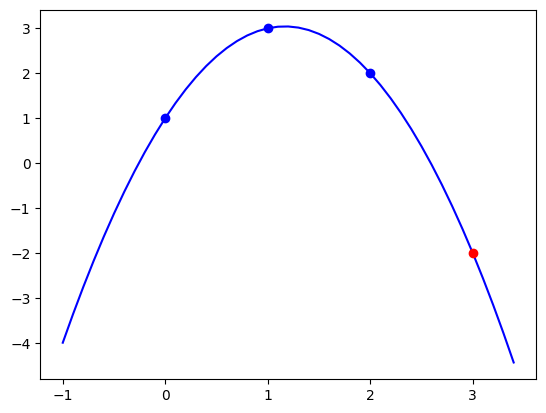

In [4]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]

x_new = np.arange(-1.0, 3.5, 0.1)

f = lagrange(x, y)

# interpolating x = 3
plt.plot(x_new, f(x_new), 'b', x, y, 'bo', 3, f(3), 'ro')
plt.show()

# Newton's Polynomial Interpolation
Newton's polynomial interpolation is another popular way to fit a set of data points.
Its general form is $f(x)=\sum_{i=0}^na_in_i(x)$ where $n$ is the number of points.

One special feature is that the coefficients can be determined using a very simple mathematical procedure, which are divided differences.
The benefit to this method is that once coefficients are determined, adding new data points won't change the previously calculated ones; only new differences need to be calculated.

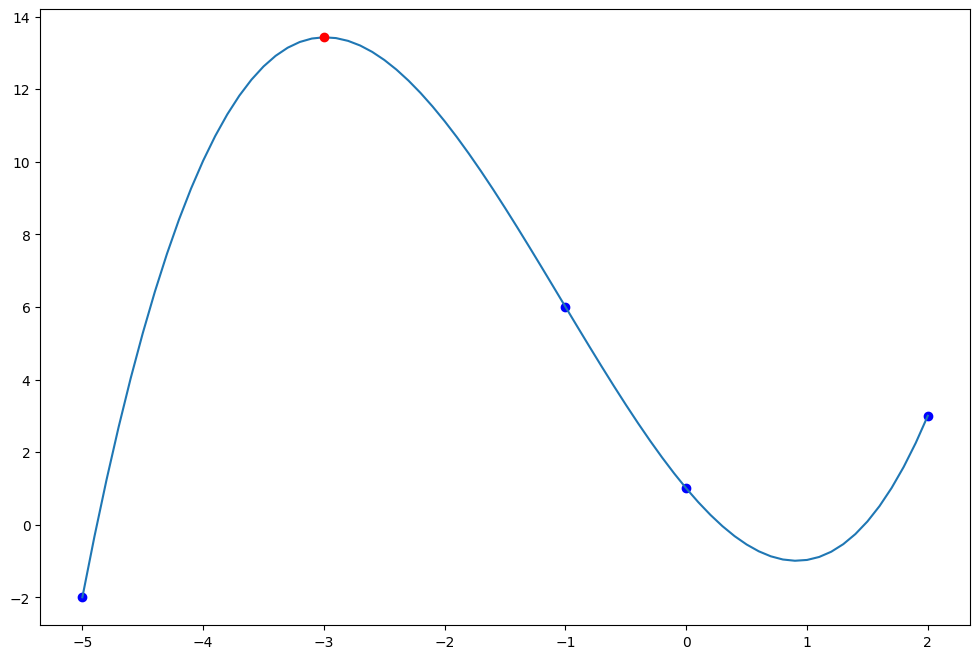

In [6]:
def divided_diff(x, y):
    """
    function to calculate the divided
    differences table
    """
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    """
    evaluate the newton polynomial
    at x
    """
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.plot(-3, newton_poly(a_s, x, -3), 'ro') # interpolate x = -3
